In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
import wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prajw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
questions_data = pd.read_csv('Questions.csv')
tags_data = pd.read_csv('Tags.csv')

In [5]:
questions_data.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,77434,14008.0,2008-09-16T21:40:29Z,171,How to access the last value in a vector?,<p>Suppose I have a vector that is nested in a...
1,79709,NaN,2008-09-17T03:39:16Z,3,Worse sin: side effects or passing massive obj...,<p>I have a function inside a loop inside a fu...
2,95007,15842.0,2008-09-18T17:59:19Z,56,Explain the quantile() function in R,<p>I've been mystified by the R quantile funct...
3,103312,NaN,2008-09-19T16:09:26Z,4,How to test for the EOF flag in R?,<p>How can I test for the <code>EOF</code> fla...
4,255697,1941213.0,2008-11-01T15:48:30Z,4,Is there an R package for learning a Dirichlet...,<p>I'm looking for a an <code>R</code> package...


In [6]:
tags_data.head()

,Id,Tag
0,77434,vector
1,79709,memory
2,79709,function
3,79709,global-variables
4,79709,side-effects


In [7]:
questions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189930 entries, 0 to 189929
Data columns (total 6 columns):
Id              189930 non-null int64
OwnerUserId     188729 non-null float64
CreationDate    189930 non-null object
Score           189930 non-null int64
Title           189930 non-null object
Body            189930 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 8.7+ MB


In [8]:
tags_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319375 entries, 0 to 319374
Data columns (total 2 columns):
Id     319375 non-null int64
Tag    319212 non-null object
dtypes: int64(1), object(1)
memory usage: 4.9+ MB


In [9]:
tags_residual = tags_data[tags_data.isna().any(axis=1)]
tags_residual.head()

,Id,Tag
1904,2991514,NaN
3425,4018082,NaN
5186,5222436,NaN
6542,5961839,NaN
8895,7169647,NaN


In [10]:
question_tags_data = pd.merge(questions_data,tags_data,how='inner',on='Id')

In [11]:
question_tags_data.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,Tag
0,77434,14008.0,2008-09-16T21:40:29Z,171,How to access the last value in a vector?,<p>Suppose I have a vector that is nested in a...,vector
1,79709,NaN,2008-09-17T03:39:16Z,3,Worse sin: side effects or passing massive obj...,<p>I have a function inside a loop inside a fu...,memory
2,79709,NaN,2008-09-17T03:39:16Z,3,Worse sin: side effects or passing massive obj...,<p>I have a function inside a loop inside a fu...,function
3,79709,NaN,2008-09-17T03:39:16Z,3,Worse sin: side effects or passing massive obj...,<p>I have a function inside a loop inside a fu...,global-variables
4,79709,NaN,2008-09-17T03:39:16Z,3,Worse sin: side effects or passing massive obj...,<p>I have a function inside a loop inside a fu...,side-effects


In [12]:
question_tags_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319375 entries, 0 to 319374
Data columns (total 7 columns):
Id              319375 non-null int64
OwnerUserId     317827 non-null float64
CreationDate    319375 non-null object
Score           319375 non-null int64
Title           319375 non-null object
Body            319375 non-null object
Tag             319212 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 19.5+ MB


In [13]:
question_tags_data.drop(['OwnerUserId','OwnerUserId','Id','CreationDate','Body','Score'],axis=1,inplace=True)
question_tags_data.columns = question_tags_data.columns.str.strip()
question_tags_data.columns = question_tags_data.columns.str.replace(' ', '_')
question_tags_data.columns = question_tags_data.columns.str.lower()

In [14]:
question_tags_data.head()

,title,tag
0,How to access the last value in a vector?,vector
1,Worse sin: side effects or passing massive obj...,memory
2,Worse sin: side effects or passing massive obj...,function
3,Worse sin: side effects or passing massive obj...,global-variables
4,Worse sin: side effects or passing massive obj...,side-effects


In [15]:
question_tags_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319375 entries, 0 to 319374
Data columns (total 2 columns):
title    319375 non-null object
tag      319212 non-null object
dtypes: object(2)
memory usage: 7.3+ MB


In [16]:
question_tags_data[question_tags_data.isna().any(axis=1)].head()

,title,tag
1904,Prevent unlist to drop NULL values,NaN
3425,How to ignore null values in R?,NaN
5186,Can autoconversion of db NULL to 0 be prevente...,NaN
6542,remove row with nan value,NaN
8895,How can I make rjson's fromJSON method convert...,NaN


### Text Cleaning

### Dropping na

In [17]:
question_tags_data.dropna(axis=0,inplace=True)

In [18]:
question_tags_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319212 entries, 0 to 319374
Data columns (total 2 columns):
title    319212 non-null object
tag      319212 non-null object
dtypes: object(2)
memory usage: 7.3+ MB


In [19]:
question_tags_data.head()

,title,tag
0,How to access the last value in a vector?,vector
1,Worse sin: side effects or passing massive obj...,memory
2,Worse sin: side effects or passing massive obj...,function
3,Worse sin: side effects or passing massive obj...,global-variables
4,Worse sin: side effects or passing massive obj...,side-effects


[Text(0, 0, 'ggplot2'),
 Text(0, 0, 'dataframe'),
 Text(0, 0, 'plot'),
 Text(0, 0, 'shiny'),
 Text(0, 0, 'dplyr'),
 Text(0, 0, 'data.table'),
 Text(0, 0, 'matrix'),
 Text(0, 0, 'loops'),
 Text(0, 0, 'regex'),
 Text(0, 0, 'function'),
 Text(0, 0, 'rstudio'),
 Text(0, 0, 'list'),
 Text(0, 0, 'for-loop'),
 Text(0, 0, 'time-series'),
 Text(0, 0, 'statistics'),
 Text(0, 0, 'knitr'),
 Text(0, 0, 'csv'),
 Text(0, 0, 'subset'),
 Text(0, 0, 'r-markdown'),
 Text(0, 0, 'python')]

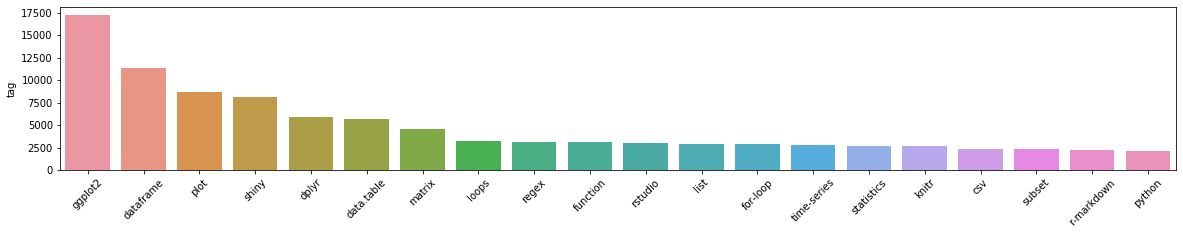

In [20]:
plt.figure(figsize=(20,3))
count_plot = sns.barplot(x=question_tags_data.tag.value_counts().nlargest(20).index, y=question_tags_data.tag.value_counts().nlargest(20))
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45)

In [21]:
question_tags_data_grouped = question_tags_data.groupby('tag').head(500).reset_index(drop=True)

In [22]:
question_tags_data_grouped.head()

,title,tag
0,How to access the last value in a vector?,vector
1,Worse sin: side effects or passing massive obj...,memory
2,Worse sin: side effects or passing massive obj...,function
3,Worse sin: side effects or passing massive obj...,global-variables
4,Worse sin: side effects or passing massive obj...,side-effects


In [23]:
value_counts = question_tags_data_grouped.tag.value_counts()
to_remove = value_counts[value_counts<100].index
question_tags_data_grouped = question_tags_data_grouped[~question_tags_data_grouped.tag.isin(to_remove)]

In [24]:
print(question_tags_data_grouped.shape)
print(question_tags_data_grouped.head())

(136331, 2)
                                               title         tag
0          How to access the last value in a vector?      vector
1  Worse sin: side effects or passing massive obj...      memory
2  Worse sin: side effects or passing massive obj...    function
5               Explain the quantile() function in R        math
6               Explain the quantile() function in R  statistics


In [25]:
print(len(question_tags_data_grouped.tag.unique()))

487


In [26]:
question_tags_data_grouped.head()

,title,tag
0,How to access the last value in a vector?,vector
1,Worse sin: side effects or passing massive obj...,memory
2,Worse sin: side effects or passing massive obj...,function
5,Explain the quantile() function in R,math
6,Explain the quantile() function in R,statistics


In [27]:
#removing stopwords
stop=set(stopwords.words('english'))
question_tags_data_grouped['title_without_stopwords'] = question_tags_data_grouped['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#converting title to lower case
question_tags_data_grouped['title_without_stopwords'] = question_tags_data_grouped['title_without_stopwords'].str.lower()
#removing html tags if any in title
question_tags_data_grouped['title_without_stopwords'] = question_tags_data_grouped['title_without_stopwords'].str.replace('<[^<]+?>', '') # Use regex to remove html tags
#stemming
porter_stemmer = PorterStemmer()
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

question_tags_data_grouped['title_without_stopwords'] = question_tags_data_grouped['title_without_stopwords'].apply(stem_sentences)


In [28]:
question_tags_data_grouped['title']=question_tags_data_grouped['title_without_stopwords']
question_tags_data_grouped.drop(['title_without_stopwords'],axis=1,inplace=True)
question_tags_data_grouped.to_csv('modified_question.csv')
question_tags_data_grouped.head(10)

,title,tag
0,how access last valu vector?,vector
1,wors sin: side effect pass massiv objects?,memory
2,wors sin: side effect pass massiv objects?,function
5,explain quantile() function r,math
6,explain quantile() function r,statistics
7,how test eof flag r?,file
8,how test eof flag r?,file-io
10,is r packag learn dirichlet prior count data,math
11,is r packag learn dirichlet prior count data,statistics
12,is r packag learn dirichlet prior count data,bayesian


In [29]:
tup = dict(result.items())
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

NameError: name 'result' is not defined